In [1]:
import os
os.chdir('..')

In [2]:
from pathlib import Path
import json
import yaml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
run_dir = Path("logs/train/runs/mnist")
metric_files = [d for d in run_dir.rglob("metrics.csv")]

In [8]:
df = pd.concat([pd.read_csv(m) for m in metric_files], ignore_index=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,test_aug,train_aug,eval_seed,train_seed,test/loss,test/acc
0,blur,gaussian_noise,12345,12345,0.578279,0.8559
1,brightness,gaussian_noise,12345,12345,0.134458,0.9590
2,baseline,gaussian_noise,12345,12345,0.067722,0.9811
3,gaussian_noise,gaussian_noise,12345,12345,0.067311,0.9812
4,rotation,gaussian_noise,12345,12345,0.215376,0.9478


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_aug    100 non-null    object 
 1   train_aug   100 non-null    object 
 2   eval_seed   100 non-null    int64  
 3   train_seed  100 non-null    int64  
 4   test/loss   100 non-null    float64
 5   test/acc    100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [20]:
group_df = df.groupby(["test_aug", "train_aug"], as_index=False).mean()
group_df.head(5)

,test_aug,train_aug,eval_seed,train_seed,test/loss,test/acc
0,baseline,baseline,12345.0,10587.75,0.068644,0.980600
1,baseline,blur,12345.0,10587.75,0.066172,0.980375
2,baseline,brightness,12345.0,10587.75,0.066757,0.980375
3,baseline,gaussian_noise,12345.0,10587.75,0.072328,0.979750
4,baseline,rotation,12345.0,10587.75,0.056397,0.982400


In [21]:
corr = group_df.pivot(index="test_aug", columns="train_aug", values="test/acc")
corr = corr.apply(lambda x: x - corr.iloc[:, 0])

train_aug,baseline,blur,brightness,gaussian_noise,rotation
test_aug,,,,,
baseline,0.980600,0.980375,0.980375,0.979750,0.9824
blur,0.853475,0.977400,0.896975,0.839025,0.8567
brightness,0.902350,0.886250,0.978750,0.949950,0.8985
gaussian_noise,0.980550,0.979900,0.980450,0.979625,0.9821
rotation,0.946750,0.946975,0.949700,0.946800,0.9784


In [33]:
corr.style.background_gradient(cmap='PuOr', 
    vmin=-0.15, vmax=0.15, axis=None)

train_aug,baseline,blur,brightness,gaussian_noise,rotation
test_aug,,,,,
baseline,0.000000,-0.000225,-0.000225,-0.000850,0.001800
blur,0.000000,0.123925,0.043500,-0.014450,0.003225
brightness,0.000000,-0.016100,0.076400,0.047600,-0.003850
gaussian_noise,0.000000,-0.000650,-0.000100,-0.000925,0.001550
rotation,0.000000,0.000225,0.002950,0.000050,0.031650


<AxesSubplot: xlabel='train_aug', ylabel='test_aug'>

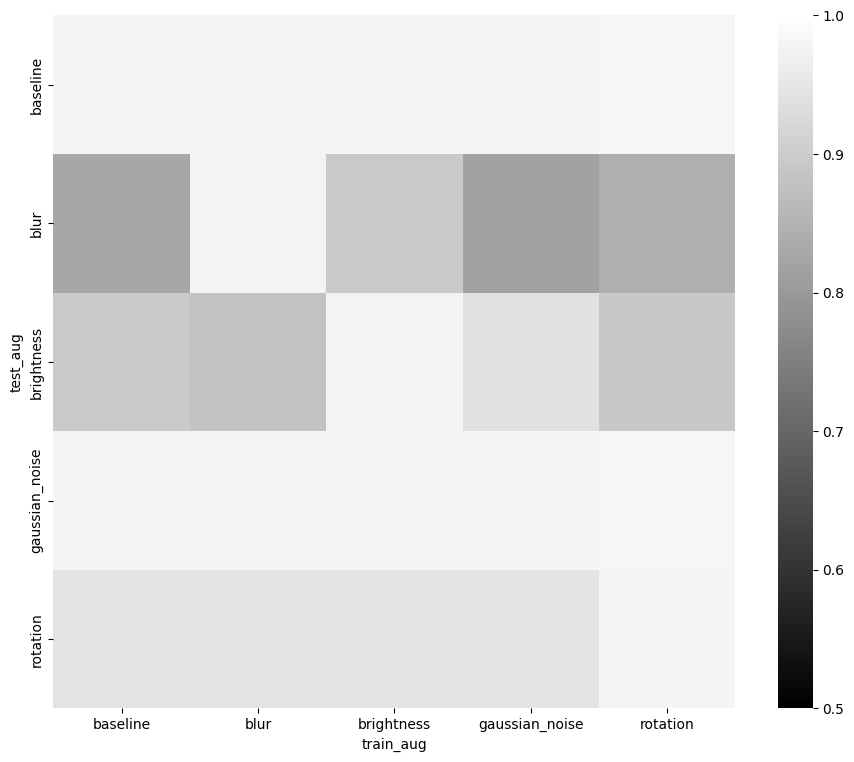

In [14]:
# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "gray"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0.5, vmax=1.0)